<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/02_Neural_Network_Multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
from tensorflow.keras.datasets import fashion_mnist

# Data has already splited into training and testing sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# Show the first train example
print(f"Training example:\n{train_data[0]}\n")
print(f"Training label example:\n{train_labels[0]}\n")

Training example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [6]:
# Check the shape of the first example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

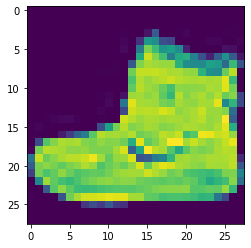

In [7]:
# Plot a single example
plt.imshow(train_data[0])

In [8]:
# Check out example label
train_labels[0]

9

In [9]:
# Create a small list so that we can index onto our training labels, so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

Text(0.5, 1.0, 'T-shirt/top')

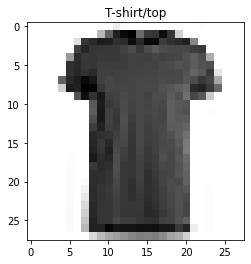

In [13]:
# Plot another example with its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

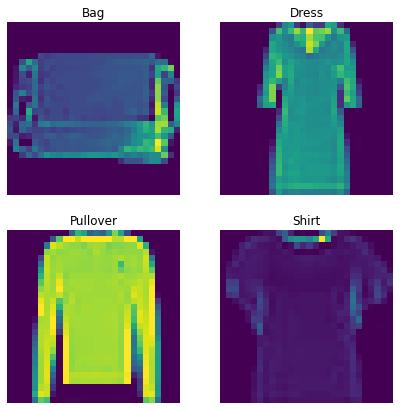

In [16]:
# Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

* Input shape = 28 x 28
* Output shape = 10
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax

In [39]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history = model.fit(train_data, train_labels, epochs=10, 
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [24]:
# Check the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


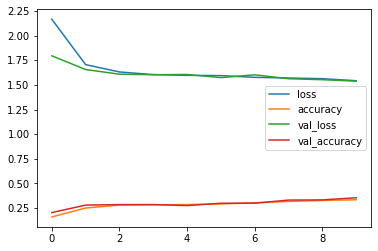

In [40]:
pd.DataFrame(history.history).plot()

In [30]:
# Check the min and max of the training data
train_data.min(), train_data.max()

(0, 255)

In [32]:
# Normalization / Min-Max Scaling 
# X_new = (X - X_min)/(X_max - X_min)
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [42]:
tf.random.set_seed(42)

# Create the model
model_v2 = tf.keras.Sequential()
model_v2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_v2.add(tf.keras.layers.Dense(4, activation="relu"))
model_v2.add(tf.keras.layers.Dense(4, activation="relu"))
model_v2.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile the model
model_v2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_v2 = model_v2.fit(train_data_norm,
                          train_labels,
                          epochs=10,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

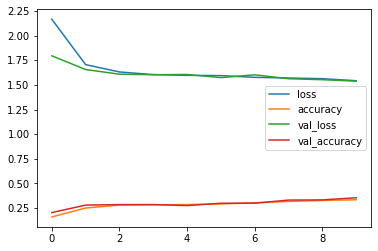

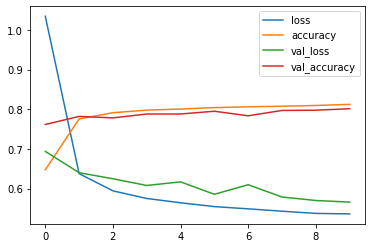

In [44]:
pd.DataFrame(history.history).plot()
pd.DataFrame(history_v2.history).plot()

##Find the ideal learning rate

In [49]:
# Set the random seed
tf.random.set_seed(42)

# Create the model 
model_v3 = tf.keras.Sequential()
model_v3.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_v3.add(tf.keras.layers.Dense(4, activation="relu"))
model_v3.add(tf.keras.layers.Dense(4, activation="relu"))
model_v3.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile the model
model_v3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))

# Fit the model
history_v3 = model_v3.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          callbacks=[lr_scheduler],
                          validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

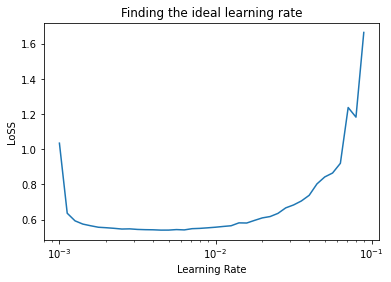

In [70]:
# Plot learning rate decay curve
lrs = 1e-3 * 10**(np.arange(40)/20)
plt.semilogx(lrs, history_v3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("LoSS")
plt.title("Finding the ideal learning rate")

In [72]:
# Let's refit the model with ideal learning rate 0.001
# Set random seed
tf.random.set_seed(42)

# Create the model
model_v4 = tf.keras.Sequential()
model_v4.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_v4.add(tf.keras.layers.Dense(4, activation="relu"))
model_v4.add(tf.keras.layers.Dense(4, activation="relu"))
model_v4.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile the model
model_v4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the model
history_v4 = model_v4.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

##Evaluate our multi-class classification model

In [102]:
# Predict the test data
test_pred = model_v4.predict(test_data_norm)
test_pred[0]

array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
       5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
       4.0605278e-03, 8.0787367e-01], dtype=float32)

In [107]:
# Convert all the predictions into integers
"""
test_preds = []
for i in range(len(test_pred)):
  test_preds.append(tf.argmax(test_pred[i]).numpy())
"""
test_preds = test_pred.argmax(axis=1)
test_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [108]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, test_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

In [105]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

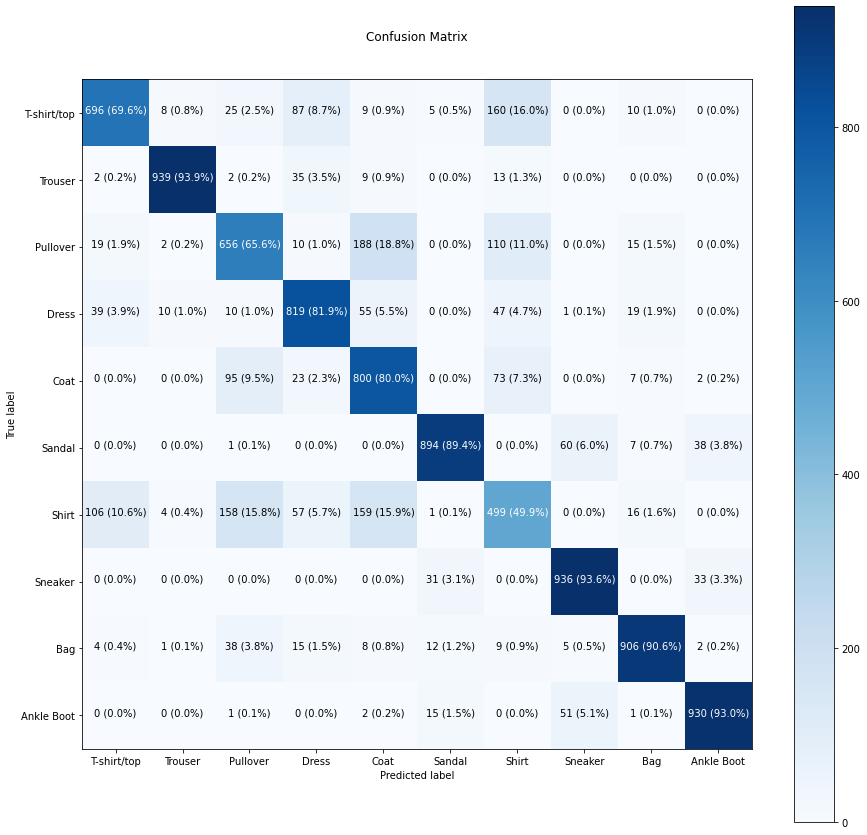

In [109]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=test_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Evaluate our model by
* Plot a random image 
* Make prediction for that image
* Label the plot with true label and predicted label

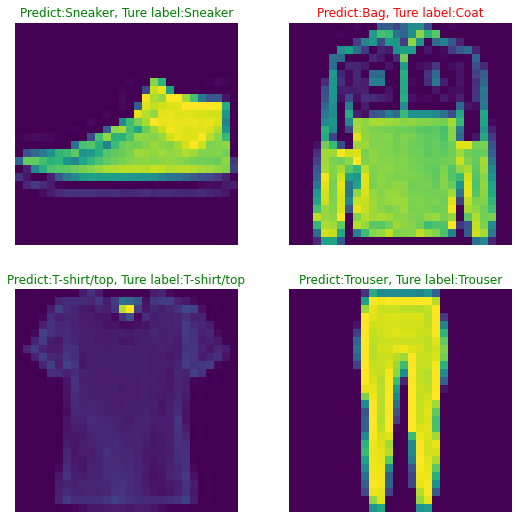

In [161]:
# Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(9, 9))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)

  # Set up random index, plot image of that index
  rand_index = random.choice(range(len(test_data)))
  plt.imshow(test_data[rand_index])

  # Create predictions and targets
  pred_probs = model_v4.predict(test_data_norm[rand_index].reshape(1, 28, 28))
  pred_label = class_names[pred_probs.argmax()]
  true_label = class_names[test_labels[rand_index]]

  # If the prediction matches up with the target, use green color to show the title
  # Otherwise, use red
  if(pred_label == true_label):
    color = "green"
  else:
    color = "red"
  plt.title(f"Predict:{pred_label}, Ture label:{true_label}", color=color)
  plt.axis(False)

In [156]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and true label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image)

  # Change the color of the titles depending if the prediction is right or wrong
  if(pred_label == true_label):
    color = "green"
  else:
    color = "red"

  # Add xlabel information
  plt.xlabel("Pred:{}{:2.0f}%(True:{})".format(pred_label,
                                               100*tf.reduce_max(pred_probs),
                                               true_label), color=color)

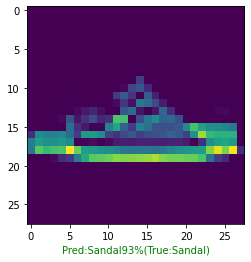

In [160]:
# Check out a random image with its prediction
plot_random_image(model=model_v4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [162]:
# Find out layers of the most recent model
model_v4.layers

In [163]:
# Extract a particular layer
model_v4.layers[1]

In [167]:
# Get the patterns of a layer of our model
weights,bias = model_v4.layers[1].get_weights()

weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [169]:
# Check out bias vector
bias, bias.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

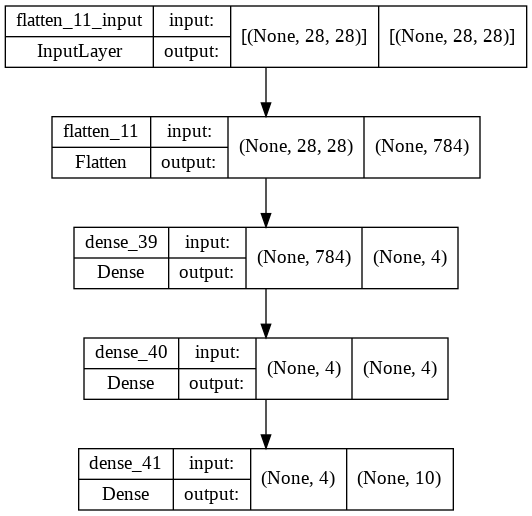

In [172]:
from tensorflow.keras.utils import plot_model
plot_model(model_v4, show_shapes=True)